---
---
# Logistic regression for multi-class classification

### * A basic implementation, on MNIST digits dataset, that includes a single linear layer (from 28x28 greyscale image to a length-10 activation vector), followed by a soft-max operation, minimizing the standard cross-entropy loss.

### * Training is done under 4 (2x2) different settings of the hyper-parameters.

### * There are missing pieces of code that you should fill in (notice the  - <font color='red'>EDIT CODE</font> messages).

### * You are required to submit this ipynb file, <font color='blue'>including the executed output blocks</font>.
---
---

## 1] import libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## 2] load data

In [15]:
filename_data   = './data/assignment_05_data.npz'
if os.path.exists(filename_data):
  print('data already exists')
else:
  print('downloading data...')
  !mkdir './data'
  !wget -O './data/assignment_05_data.npz' https://www.cs.haifa.ac.il/~skorman/assignment_05_data.npz

data already exists


In [16]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training images :', x_train.shape[0])
print('height of training images :', x_train.shape[1])
print('width of training images :', x_train.shape[2])
print('*************************************************')
print('number of testing images :', x_test.shape[0])
print('height of testing images :', x_test.shape[1])
print('width of testing images :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training images : 20000
height of training images : 28
width of training images : 28
*************************************************
number of testing images : 8000
height of testing images : 28
width of testing images : 28
*************************************************


## 3] number of classes

In [17]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## 4] vectorize image data

In [18]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## 5] index for each class

In [19]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## 6] plot data

In [20]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 1, nRow * 1))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [21]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

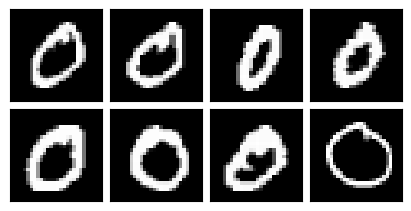

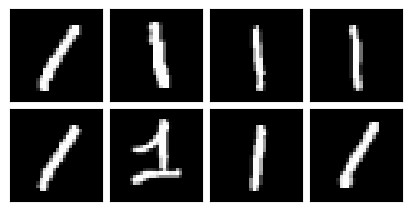

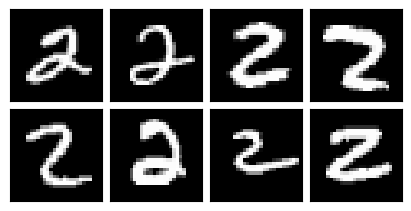

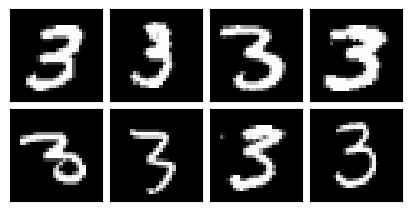

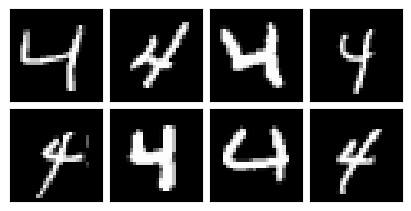

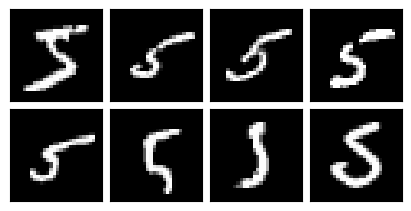

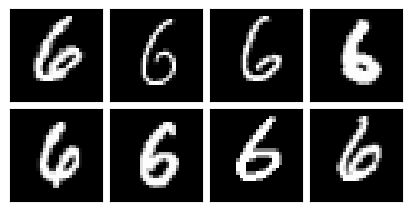

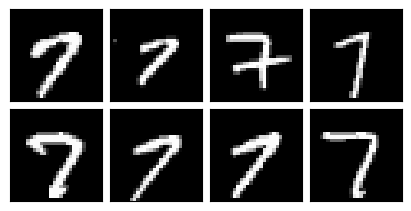

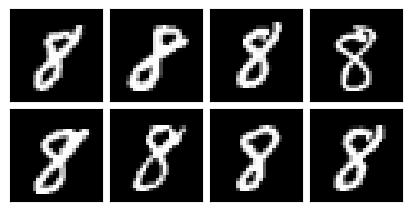

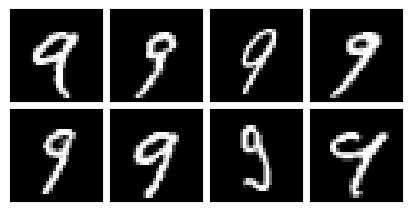

In [22]:
for i in range(nClass):
    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## 7] linear layer

In [ ]:
def layer_linear(input, weight):

    output = np.matmul(input, np.transpose(weight))

    return output

## 8] softmax function - <font color='red'>EDIT CODE</font>


In [ ]:
def activation_softmax(input):

    output =

    return output

## 9] compute prediction by the forward propagation of the neural network - <font color='red'>EDIT CODE</font>

In [ ]:
def compute_prediction(input, weight):

    prediction =

    return prediction

## 10] compute cross-entropy loss - <font color='red'>EDIT CODE</font>

In [ ]:
def compute_loss_cross_entropy(prediction, label):

    loss =

    return loss

## 11] compute weight decay regularization term of loss - <font color='red'>EDIT CODE</font>

In [ ]:
def compute_loss_regularization(weight):

    loss =

    return loss

## 12] compute final loss function - <font color='red'>EDIT CODE</font>
### - using the hyper-parameter lmbda to balance the cross-entropy and weight-decay (L=CE+lmbda*WD)

In [ ]:
def compute_loss(prediction, label, lmbda, weight):

    loss =

    return loss

## 13] compute gradient for the cross-entropy term  - <font color='red'>EDIT CODE</font>
(follow, for example, https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/)

In [ ]:
def compute_gradient_cross_entropy(input, prediction, label):

    gradient =

    return gradient

## 14] compute gradient for the regularization term - <font color='red'>EDIT CODE</font>

In [ ]:
def compute_gradient_regularization(lmbda, weight):

    gradient =

    return gradient

## 15] compute final combined gradient - <font color='red'>EDIT CODE</font>

In [ ]:
def compute_gradient(input, prediction, label, lmbda, weight):

    gradient =

    return gradient

## 16] compute accuracy - <font color='red'>EDIT CODE</font>

In [ ]:
def compute_accuracy(prediction, label):

    accuracy =

    return accuracy

## 17] consider bias in the data

### - bias represented by extending the input with a '1' scalar


In [ ]:
one_train   = np.ones((x_train.shape[0], 1))
one_test    = np.ones((x_test.shape[0], 1))

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis=1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis=1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

## 18] construct model parameters and initialize them - <font color='red'>EDIT CODE</font>

In [ ]:
def get_weight(dim_input, dim_output):

    weight =
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight[...] = 0.001
    weight[...] = 1

    return weight

In [ ]:
dim_input   =
dim_output  =

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])

## 19] hyper-parameters

In [ ]:
number_epochs    = 800
learning_rate       = 0.001

list_size_minibatch = [50, 100]
list_weight_decay   = [0.001, 0.01]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## 20] variables for optimization information (for different minibatch sizes)

In [ ]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_epochs))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_epochs))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_epochs))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_epochs))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_epochs))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_epochs))

## 21] variables for optimization information (for different weight decay values)

In [ ]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_epochs))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_epochs))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_epochs))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_epochs))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_epochs))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_epochs))

---
# Training
---

### 1] SGD iterations with different mini-batch sizes (with weight decay = 0) - <font color='red'>EDIT CODE</font>

In [ ]:
# iteration for mini-batch
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   =
    lmbda           = 0

    print('mini-batch size = %3d, lmbda = %4.3f' % (size_minibatch, lmbda))

    weight =

    # initialze seed for generating random number
    np.random.seed(0)

    # iteration for epoch
    for i in tqdm(range(number_epochs)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j * size_minibatch : (j+1) * size_minibatch]

            data    =
            label   =

            prediction  =
            gradient    =
            # update network weights:
            weight      =

            # compute measures after update:
            prediction  =
            loss        =
            accuracy    =

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] =
        train_loss_std_minibatch[k, i]  =

        train_accuracy_mean_minibatch[k, i] =
        train_accuracy_std_minibatch[k, i]  =

        # testing
        data    =
        label   =

        prediction      =
        loss_test       =
        accuracy_test   =

        test_loss_minibatch[k, i]       =
        test_accuracy_minibatch[k, i]   =

## 2] SGD iterations with different weight decay parameter (with mini-batch size = 100) - <font color='red'>EDIT CODE</font>

In [ ]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   =
    lmbda           = list_weight_decay[k]

    print('mini-batch size = %3d, lmbda = %4.3f' % (size_minibatch, lmbda))

    weight =
    # initialze seed for generating random number
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_epochs)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j * size_minibatch : (j+1) * size_minibatch]

            data    =
            label   =

            prediction  =
            gradient    =
            # update network weights:
            weight      =

            # compute measures after update:
            prediction  =
            loss        =
            accuracy    =

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] =
        train_loss_std_weight_decay[k, i]  =

        train_accuracy_mean_weight_decay[k, i] =
        train_accuracy_std_weight_decay[k, i]  =

        # testing
        data    =
        label   =

        prediction      =
        loss_test       =
        accuracy_test   =

        test_loss_weight_decay[k, i]       =
        test_accuracy_weight_decay[k, i]   =


---
# RESULTS
---

## 1] plot curve (helper functions)

In [ ]:
def plot_curve(data, x_label, y_label, title):

    plt.figure(figsize=(4,3))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(4,3))
    plt.title(title)

    lmbda = 0.3

    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', lmbda = lmbda)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):

    plt.figure(figsize=(8,5))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):

    plt.figure(figsize=(8,5))
    plt.title(title)

    lmbda = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', lmbda = lmbda)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', lmbda = lmbda)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

### 2] Display loss and accuracy curves (over train and test sets)

In [ ]:
plot_curve_error2(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'mini-batch size = 50',
                  train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'mini-batch size = 100',
                  'epoch', 'loss', 'loss (training): for diff. mini-batch sizes')
plot_curve_error2(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'mini-batch size = 50',
                  train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'mini-batch size = 100',
                  'epoch', 'accuracy', 'accuracy (training): for diff. mini-batch sizes')
plot_curve_error2(train_loss_mean_weight_decay[0], train_loss_std_weight_decay[0], 'weight-decay = 0.001',
                  train_loss_mean_weight_decay[1], train_loss_std_weight_decay[1], 'weight-decay = 0.01',
                  'epoch', 'loss', 'loss (training): for diff. weight-decay values')
plot_curve_error2(train_accuracy_mean_weight_decay[0], train_accuracy_std_weight_decay[0], 'weight-decay = 0.001',
                  train_accuracy_mean_weight_decay[1], train_accuracy_std_weight_decay[1], 'weight-decay = 0.01',
                  'epoch', 'accuracy', 'accuracy (training): for diff. weight-decay values')

In [ ]:
plot_curve2(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', 'epoch', 'loss', 'loss (testing) for diff. mini-batch sizes')
plot_curve2(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', 'epoch', 'accuracy', 'accuracy (testing) for diff. mini-batch sizes')
plot_curve2(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', 'epoch', 'loss', 'loss (testing) for diff weight-decay values')
plot_curve2(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', 'epoch', 'accuracy', 'accuracy (testing) for diff weight-decay values')

## 3] Show mispredictions - <font color='red'>EDIT CODE</font>
### - Visualize 5 random misclassified train images and 5 random misclassified test images.
### - For each, display the image, the predicted distribution, the true and predicted label. Make sure to visualize in a compact and clear manner.

In [ ]:
... complete here ...

### 4] Present final results  - <font color='red'>EDIT CODE</font>
### - Display a table with the final results - test accuracies for each of the tested configurations.

In [ ]:
... complete here ...

# 5] Improve results - <font color='red'>EDIT CODE</font>
## * Implement two different simple extensions / modifications / configurations that improve the best accuracy achieved above by at least 1%. Do not use a larger number of training epochs.
## * Do not make any special effort to get the best result possible, but simply reach this goal.
### - Insert the required code blocks here below.
### - At the very end (see below), present the final result (test accuracy)

code block 1

code block 2

code block ...

## Final result - <font color='red'>EDIT TEXT and CODE</font>
### - Edit this text here to explain very shortly what you have done.
### - Use the code block below to present your final results (test accuracy only).